In [1]:
import pandas as pd
import numpy as np
import os
np.random.seed(42)
%load_ext autoreload
%autoreload 2

import sys
sys.path.append(os.path.abspath("../src/RC-Model"))  # now src is on sys.path

from models import * 
from simulate import *
from plot import *
from train import *
from split_dataset import *

# === Paths ===
path_in = os.path.join("Data")  # parent directory

###################### ======================== Case Study 1 ======================= ###########################

file_path = os.path.join(path_in, "dataset2.xlsx")
cs1 = pd.read_excel(file_path)

cs1["INDOOR_TEMP"] = cs1[["RTD31", "RTD34", "RTD37", "RTD40", "RTD41"]].mean(axis=1)
# Rename columns
rename_mapping = {
        'Tout': 'OUTDOOR_TEMP',
        'PhRad_actual_power': 'PHI_H',
        'SolGlob': 'PYRANOMETER'
    }
cs1 = cs1.rename(columns=rename_mapping)
# Convert 't' to datetime and set as index

cs1['Time'] = pd.to_datetime(cs1['Time'])
cs1 = cs1.set_index('Time')
cs1_surface_area = 100  # m² 
cs1 = cs1.iloc[0:960]

train_cs1, val_cs1, test_cs1 = split_dataset(cs1, testing_days=3, val_split=0.3)


## 1R1C


=== Best result ===
Best Trial Validation #: 87
Best Trial Training #: 22
Best RMSE Validation: 0.2818
RMSE Training of Best Validation : 0.0226
Best RMSE Training: 0.0226
Best initialization Validation: {'R_in_a': 0.21375119734740183, 'C_in': 69049366.31779811, 'Ain': 0.43732542537078994}
Best initialization Training: {'R_in_a': 0.9612293732600903, 'C_in': 452769970.3360758, 'Ain': 5.874538252544104}
Best parameters Validation: {'R_in_a': 0.013474304906168565, 'C_in': 23043303.48838612, 'Ain': 3.4724821937070005, 'fh': 1, 'Objective': 0.022632530669965092, 'Solve_time': 0.025722026824951172}
Best parameters Training: {'R_in_a': 0.013474304904410088, 'C_in': 23043303.487724803, 'Ain': 3.472482200452027, 'fh': 1, 'Objective': 0.022632530669962486, 'Solve_time': 0.04304313659667969}
Solve Time: 5.686290264129639


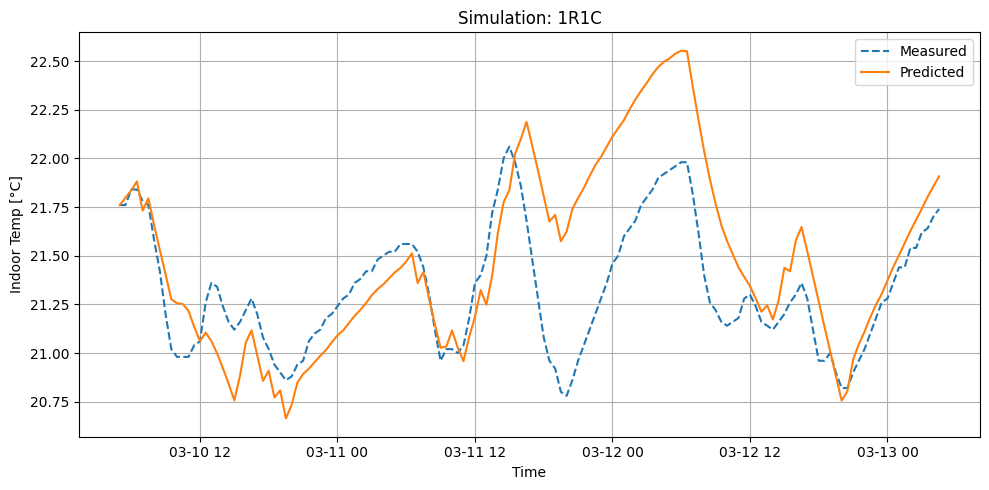

In [ ]:
# Bounds 
bounds_cs1 = {
        "R_in_a": (0.001, 1),
        "C_in": (1e6, 5e8),
        "Ain": (0.001, 0.3 * cs1_surface_area)
    }
###################### ======================== Case Study 1 ======================= ###########################

model_1r1c_cs1, parameters_1r1c_cs1, best_initialization_1r1c_cs1, validation_pred_1r1c_cs1, initialize_testing_1r1c_cs1, all_trials_1r1c_cs1 = train_greybox_model_with_validation_process(
    train_df=train_cs1, val_df=val_cs1, model_type="1R1C", bounds=bounds_cs1, 
    num_trials=100, deltaT=1800, show_plot=False, log=False)
initialize_testing_1r1c_cs1['Tin'] = test_cs1['INDOOR_TEMP'].iloc[0]
# --- Run Simulation for Testing ---
validation, test_pred = simulate_and_evaluate(
        val_df=test_cs1, param_dict=parameters_1r1c_cs1, model_type="1R1C",
        initializations=initialize_testing_1r1c_cs1, show_plot=True
    )




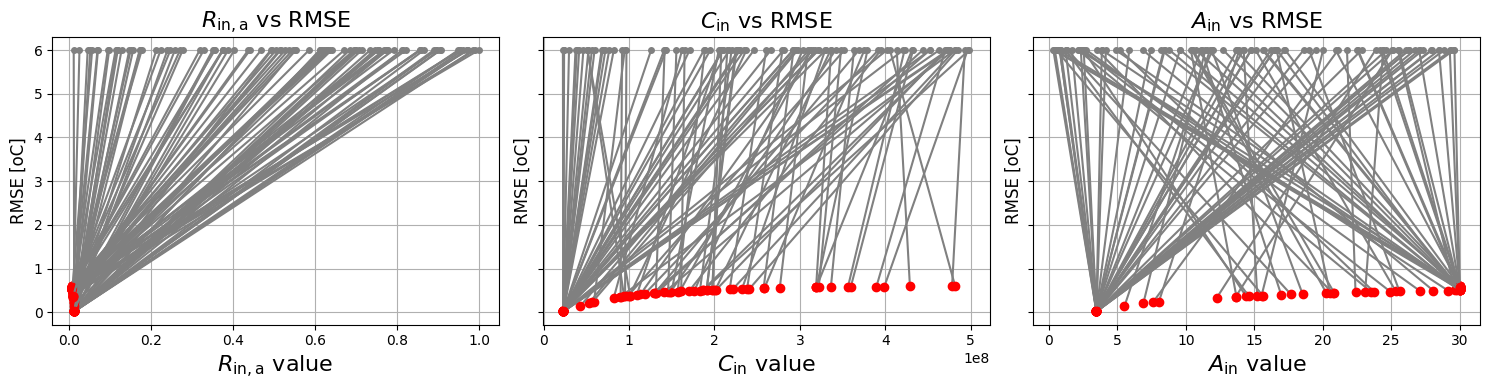

Best Objective achieved in 43 out of 100 trials.
Success rate: 43.00%
Best Objective was equal to 0.022632530669962486
Mean RMSE: 0.28
RMSE Std. Dev.: 0.24
Validation RMSE: 0.3336




In [19]:
param_list = ['R_in_a', 'C_in', 'Ain']

plot_parameters_vs_rmse_multi(all_trials_1r1c_cs1, param_list, y_start=6, rmse_threshold=6)

best_obj = all_trials_1r1c_cs1['Objective'].min()
mean_obj = all_trials_1r1c_cs1["Objective"].mean()
std_obj = all_trials_1r1c_cs1["Objective"].std()
matches = (np.round(all_trials_1r1c_cs1['Objective'], 5) == np.round(best_obj, 5))
n_matches = matches.sum()
n_total = len(all_trials_1r1c_cs1)
success_rate = 100 * n_matches / n_total

print(f"Best Objective achieved in {n_matches} out of {n_total} trials.")
print(f"Success rate: {success_rate:.2f}%")
print(f"Best Objective was equal to {best_obj}")
print(f"Mean RMSE: {mean_obj:.2f}")
print(f"RMSE Std. Dev.: {std_obj:.2f}")
print(f"Validation RMSE: {validation['RMSE']:.4f}")
print("\n")

# 2R2C


=== Best result ===
Best Trial Validation #: 2
Best Trial Training #: 81
Best RMSE Validation: 0.2249
RMSE Training of Best Validation : 0.0199
Best RMSE Training: 0.0198
Best initialization Validation: {'R_e_a': 0.8737050454826705, 'R_in_e': 0.9209515281312813, 'C_in': 31477901.96757701, 'C_e': 139161946.42545465, 'Ain': 24.186232192512048, 'Ae': 22.44804245181937, 'fh': 0.18452101935637732}
Best initialization Training: {'R_e_a': 0.5079602660270753, 'R_in_e': 0.007379485845116746, 'C_in': 144232028.45428148, 'C_e': 308846532.26949537, 'Ain': 29.435604154644675, 'Ae': 18.954773996973035, 'fh': 0.2598035810641598}
Best parameters Validation: {'R_in_e': 0.0941808061757843, 'R_e_a': 0.0013844980079020343, 'C_in': 3234413.178370926, 'C_e': 1004803.3595436469, 'Ain': 0.1861787229142572, 'Ae': 13.663668895655176, 'fh': 0.13056328959919966, 'Objective': 0.019860316078611665, 'Solve_time': 0.18281912803649902}
Best parameters Training: {'R_in_e': 0.0012273698229057727, 'R_e_a': 0.01265609235

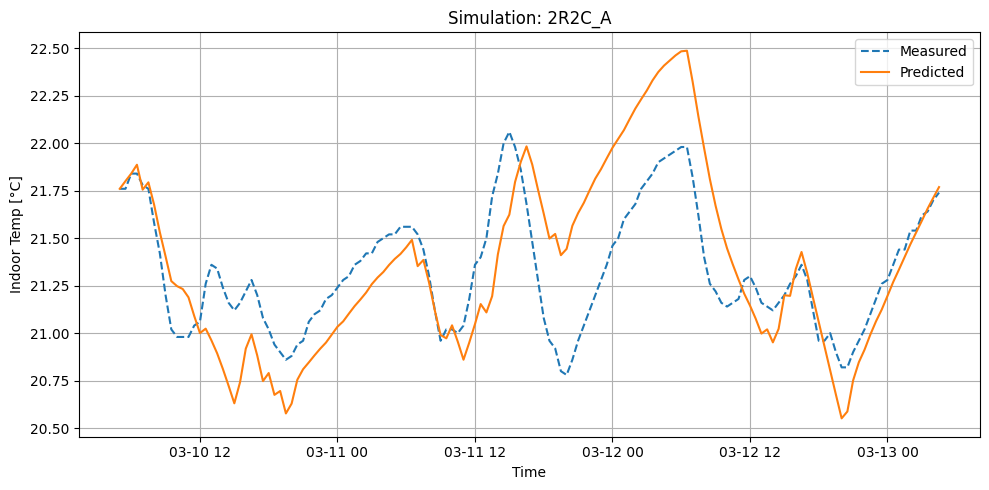

In [5]:
import numpy as np

# --- Bounds ---

bounds_cs1 = {
    "R_e_a": (0.001, 1),
    "R_in_e": (0.001, 1),
    "C_in": (1e6, 5e8),
    "C_e": (1e6, 5e8),
    "Ain": (0.001, 0.3 * cs1_surface_area),
    "Ae": (0.001, 0.3 * cs1_surface_area),
    "fh": (0,1)
}
###################### ======================== Case Study 1 ======================= ###########################

model_2r2c_cs1, parameters, best_initialization,validation_pred_2r2c_cs1, initialize_testing_2r2c_cs1, all_trials_2r2c_cs1 = train_greybox_model_with_validation_process(
    train_df=train_cs1, val_df=val_cs1, model_type="2R2C_A", bounds=bounds_cs1, 
    num_trials=100, deltaT=1800, show_plot=False, log=False)

initialize_testing_2r2c_cs1['Tin'] = test_cs1['INDOOR_TEMP'].iloc[0]

# --- Run Simulation for Testing ---
validation, test_pred = simulate_and_evaluate(
        val_df=test_cs1, param_dict=parameters, model_type="2R2C_A",
        initializations=initialize_testing_2r2c_cs1, show_plot=True
    )

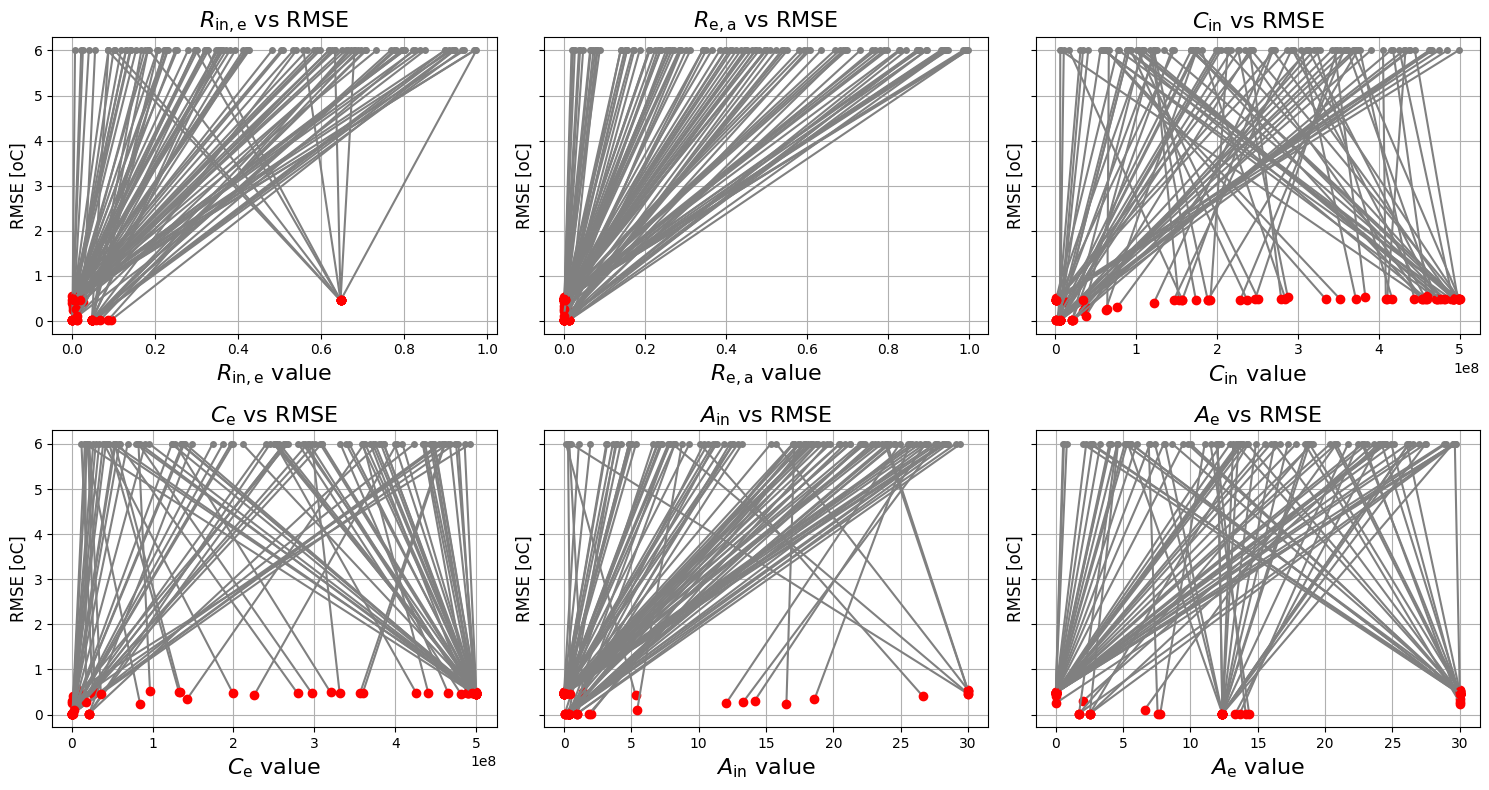

Best Objective achieved in 7 out of 100 trials.
Success rate: 7.00%
Best Objective was equal to 0.01975717974590261
Mean RMSE: 0.32
RMSE Std. Dev.: 0.21
Validation RMSE: 0.3336




In [23]:
param_list = ['R_in_e','R_e_a', 'C_in', 'C_e', 'Ain', 'Ae']
plot_parameters_vs_rmse_multi(all_trials_2r2c_cs1, param_list, y_start=6, rmse_threshold=6)

best_obj = all_trials_2r2c_cs1['Objective'].min()
mean_obj = all_trials_2r2c_cs1["Objective"].mean()
std_obj = all_trials_2r2c_cs1["Objective"].std()
matches = (np.round(all_trials_2r2c_cs1['Objective'], 5) == np.round(best_obj, 5))
n_matches = matches.sum()
n_total = len(all_trials_2r2c_cs1)
success_rate = 100 * n_matches / n_total

print(f"Best Objective achieved in {n_matches} out of {n_total} trials.")
print(f"Success rate: {success_rate:.2f}%")
print(f"Best Objective was equal to {best_obj}")
print(f"Mean RMSE: {mean_obj:.2f}")
print(f"RMSE Std. Dev.: {std_obj:.2f}")
print(f"Validation RMSE: {validation['RMSE']:.4f}")
print("\n")

model.name="unknown";
    - termination condition: maxIterations
    - message from solver: Ipopt 3.14.17\x3a Maximum Number of Iterations
      Exceeded.

=== Best result ===
Best Trial Validation #: 16
Best Trial Training #: 19
Best RMSE Validation: 0.1833
RMSE Training of Best Validation : 0.0109
Best RMSE Training: 0.0109
Best initialization Validation: {'R_in_e': 0.6394808178776848, 'R_e_a': 0.8680503762255021, 'R_in_a': 0.4552851157782252, 'C_in': 258282418.26104587, 'C_e': 244934443.54820317, 'Ain': 20.005961039957377, 'Ae': 4.189623677563911, 'fh': 0.029973589872677953}
Best initialization Training: {'R_in_e': 0.8690360794942396, 'R_e_a': 0.5710391368921909, 'R_in_a': 0.03135667263714002, 'C_in': 465543399.0579819, 'C_e': 345073848.764749, 'Ain': 20.295433921978816, 'Ae': 6.4703330044162755, 'fh': 0.6588854702326572}
Best parameters Validation: {'R_in_e': 0.004297346431646782, 'R_e_a': 0.030298522267048877, 'R_in_a': 0.025823202990555412, 'C_in': 8640347.879526503, 'C_e': 15743

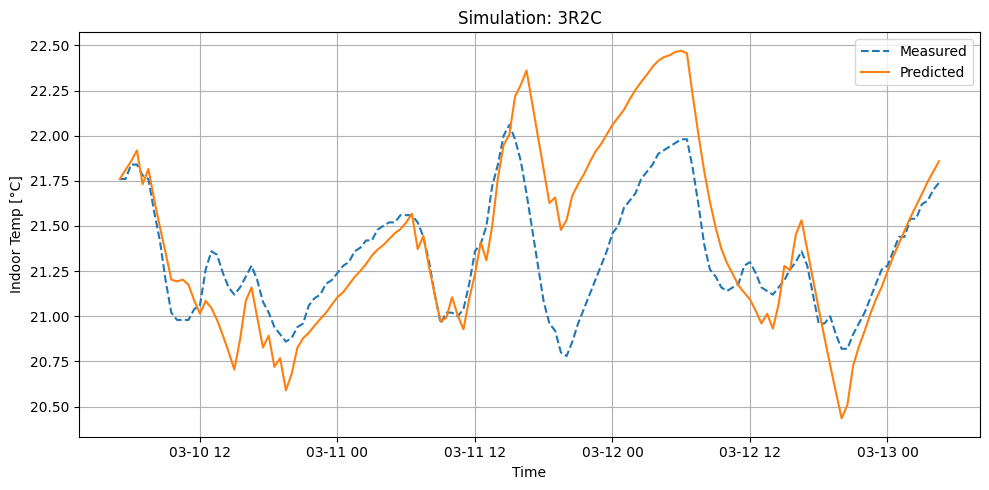

In [8]:
# --- Bounds ---

bounds_cs1 = {
    "R_in_e": (0.001, 1),
    "R_e_a": (0.001, 1),
    "R_in_a": (0.001, 1),
    "C_in": (1e6, 5e8),
    "C_e": (1e6, 5e8),
    "Ain": (0.0001, 0.3 * cs1_surface_area),
    "Ae": (0.0001, 0.3 * cs1_surface_area),
    "fh": (0,1)
}

###################### ======================== Case Study 1 ======================= ###########################

model_3r2c_cs1, parameters_3r2c_cs1, best_initialization_3r2c_cs1, validation_pred_3r2c_cs1, initialize_testing_3r2c_cs1, all_trials_3r2c_cs1 = train_greybox_model_with_validation_process(
    train_df=train_cs1, val_df=val_cs1, model_type="3R2C", bounds=bounds_cs1, 
    num_trials=100, deltaT=1800, show_plot=False, log=False)

initialize_testing_3r2c_cs1['Tin'] = test_cs1['INDOOR_TEMP'].iloc[0]

# --- Run Simulation for Testing ---
validation, test_pred = simulate_and_evaluate(
        val_df=test_cs1, param_dict=parameters_3r2c_cs1, model_type="3R2C",
        initializations=initialize_testing_3r2c_cs1, show_plot=True
    )

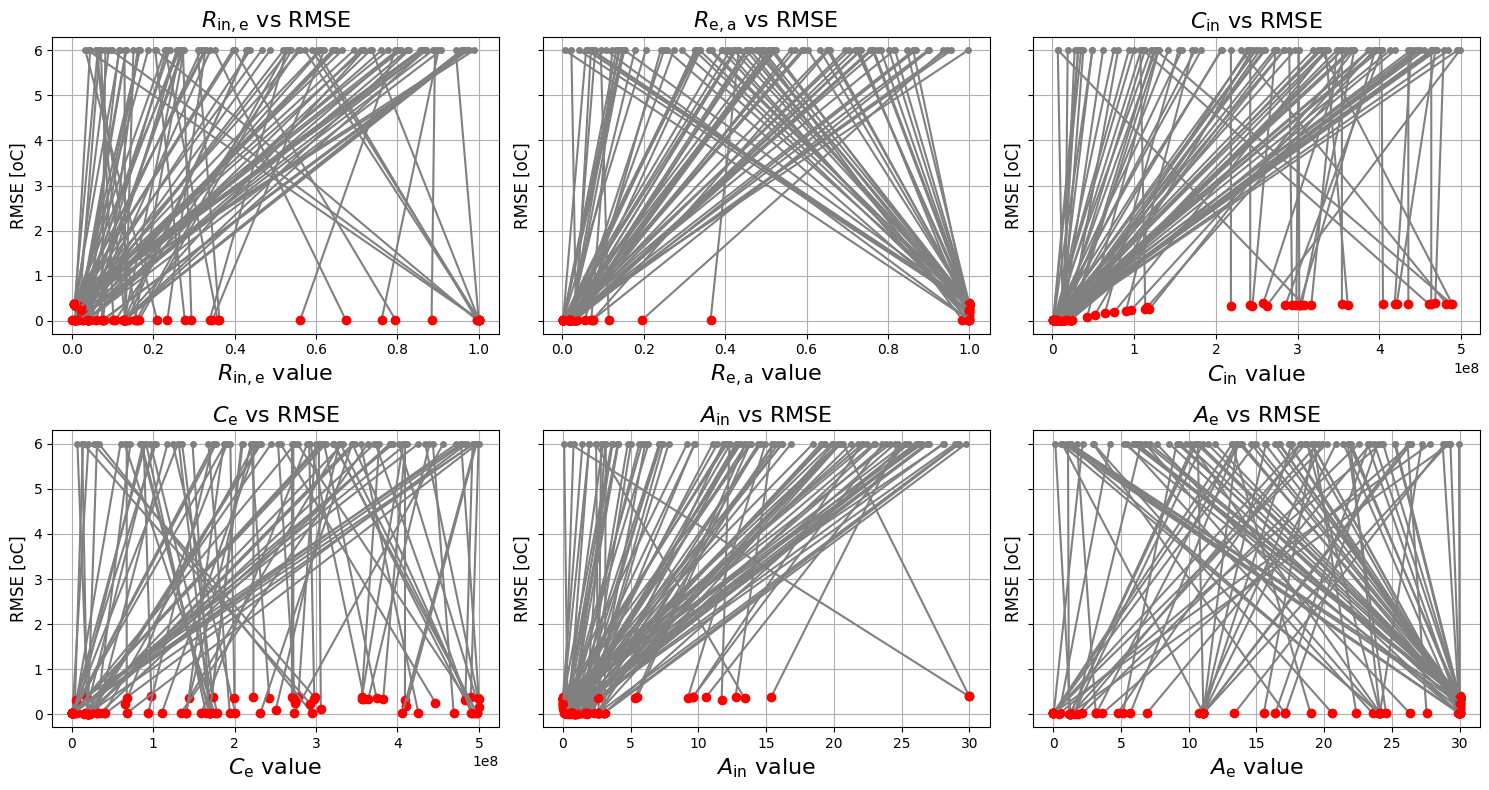

Best Objective achieved in 9 out of 100 trials.
Success rate: 9.00%
Best Objective was equal to 0.010863474176158974
Mean RMSE: 0.12
RMSE Std. Dev.: 0.15
Validation RMSE: 0.3336




In [24]:
param_list = ['R_in_e','R_e_a', 'C_in', 'C_e', 'Ain', 'Ae']

plot_parameters_vs_rmse_multi(all_trials_3r2c_cs1, param_list, y_start=6, rmse_threshold=6)

best_obj = all_trials_3r2c_cs1['Objective'].min()
mean_obj = all_trials_3r2c_cs1["Objective"].mean()
std_obj = all_trials_3r2c_cs1["Objective"].std()
matches = (np.round(all_trials_3r2c_cs1['Objective'], 5) == np.round(best_obj, 5))
n_matches = matches.sum()
n_total = len(all_trials_3r2c_cs1)
success_rate = 100 * n_matches / n_total

print(f"Best Objective achieved in {n_matches} out of {n_total} trials.")
print(f"Success rate: {success_rate:.2f}%")
print(f"Best Objective was equal to {best_obj}")
print(f"Mean RMSE: {mean_obj:.2f}")
print(f"RMSE Std. Dev.: {std_obj:.2f}")
print(f"Validation RMSE: {validation['RMSE']:.4f}")
print("\n")

[Trial 48] Failed: Cannot load a SolverResults object with bad status: error

=== Best result ===
Best Trial Validation #: 78
Best Trial Training #: 97
Best RMSE Validation: 0.1850
RMSE Training of Best Validation : 0.0116
Best RMSE Training: 0.0079
Best initialization Validation: {'R_int_in': 0.2008717957938672, 'R_in_e': 0.8777151065611729, 'R_e_a': 0.7392457044251132, 'R_in_a': 0.01571806290332256, 'C_int': 125090078.67245634, 'C_in': 108145953.71699049, 'C_e': 136278196.4248419, 'Aint': 7.426868352419564, 'Ain': 1.8758826196557978, 'Ae': 13.76826960385295, 'fh_int': 0.7327334747861651, 'fh_in': 0.6067317247174364, 'fh_e': 0.6728716685980798}
Best initialization Training: {'R_int_in': 0.2734021473396119, 'R_in_e': 0.692974204616136, 'R_e_a': 0.2655338607243313, 'R_in_a': 0.939190342491391, 'C_int': 318623491.6288471, 'C_in': 163066485.92746064, 'C_e': 135632516.9113856, 'Aint': 5.727878459490798, 'Ain': 20.839259302715945, 'Ae': 6.561546518376519, 'fh_int': 0.5953032659274891, 'fh_i

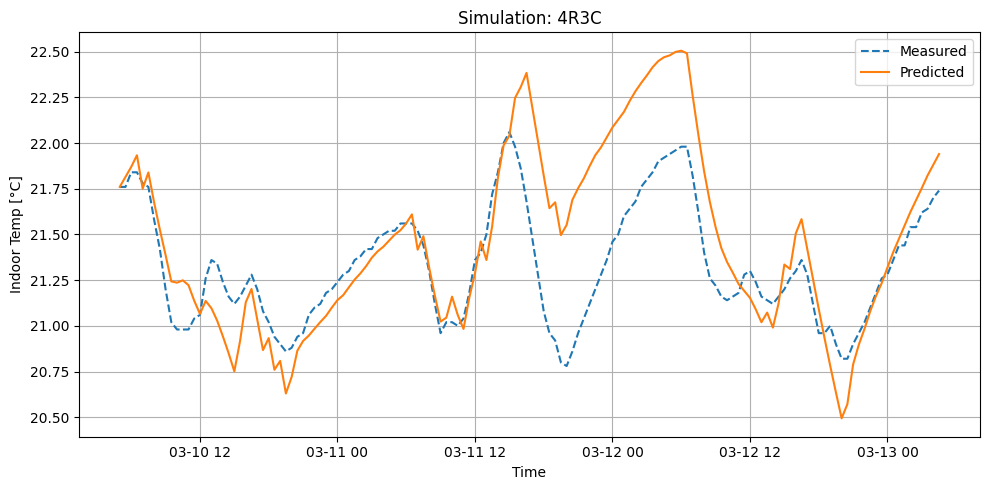

In [10]:
import numpy as np

# --- Bounds ---

bounds_cs1 = {
    "R_int_in": (0.002, 1),
    "R_in_e": (0.002, 1),
    "R_e_a": (0.002, 1),
    "R_in_a": (0.002, 1),
    "C_int": (1.2e6, 5e8),
    "C_in": (1.2e6, 5e8),
    "C_e": (1.2e6, 5e8),
    "Aint": (0.0001, 0.3 * cs1_surface_area),
    "Ain": (0.0001, 0.3 * cs1_surface_area),
    "Ae": (0.0001, 0.3 * cs1_surface_area),
    "fh_int": (0,1),
    "fh_in": (0,1),
    "fh_e": (0,1)
}

###################### ======================== Case Study 1 ======================= ###########################

model_4r3c_cs1, parameters_4r3c_cs1, best_initialization_4r3c_cs1, validation_pred_4r3c_cs1, initialize_testing_4r3c_cs1, all_trials_4r3c_cs1 = train_greybox_model_with_validation_process(
    train_df=train_cs1, val_df=val_cs1, model_type="4R3C", bounds=bounds_cs1, 
    num_trials=100, deltaT=1800, show_plot=False, log=False)

initialize_testing_4r3c_cs1['Tin'] = test_cs1['INDOOR_TEMP'].iloc[0]

# --- Run Simulation for Testing ---
validation, test_pred = simulate_and_evaluate(
        val_df=test_cs1, param_dict=parameters_4r3c_cs1, model_type="4R3C",
        initializations=initialize_testing_4r3c_cs1, show_plot=True
    )

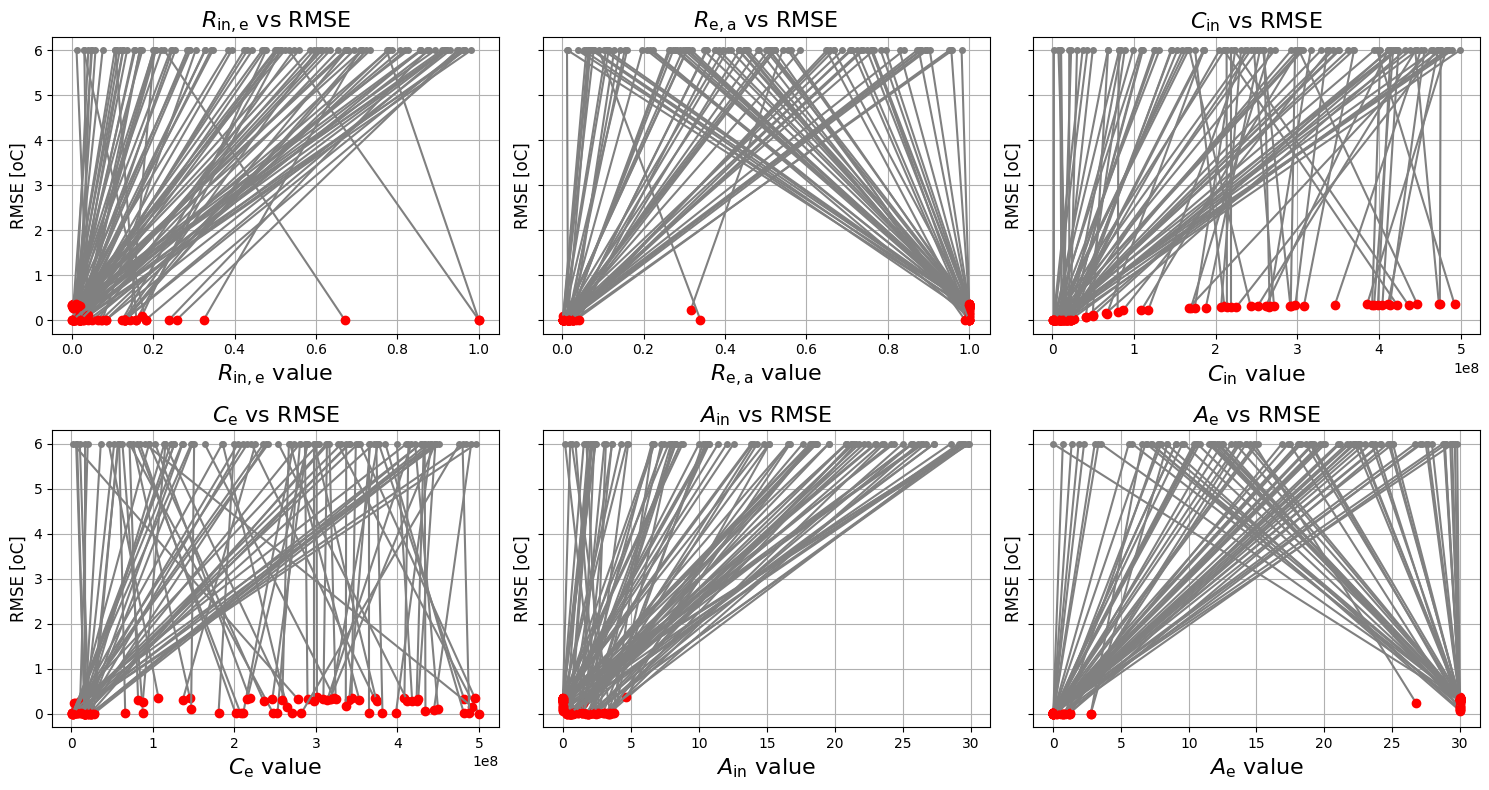

Best Objective achieved in 2 out of 99 trials.
Success rate: 2.02%
Best Objective was equal to 0.007857215054754396
Mean RMSE: 0.13
RMSE Std. Dev.: 0.15
Validation RMSE: 0.3336




In [25]:
param_list = ['R_in_e','R_e_a', 'C_in', 'C_e', 'Ain', 'Ae']

plot_parameters_vs_rmse_multi(all_trials_4r3c_cs1, param_list, y_start=6, rmse_threshold=6)

best_obj = all_trials_4r3c_cs1['Objective'].min()
mean_obj = all_trials_4r3c_cs1["Objective"].mean()
std_obj = all_trials_4r3c_cs1["Objective"].std()
matches = (np.round(all_trials_4r3c_cs1['Objective'], 5) == np.round(best_obj, 5))
n_matches = matches.sum()
n_total = len(all_trials_4r3c_cs1)
success_rate = 100 * n_matches / n_total

print(f"Best Objective achieved in {n_matches} out of {n_total} trials.")
print(f"Success rate: {success_rate:.2f}%")
print(f"Best Objective was equal to {best_obj}")
print(f"Mean RMSE: {mean_obj:.2f}")
print(f"RMSE Std. Dev.: {std_obj:.2f}")
print(f"Validation RMSE: {validation['RMSE']:.4f}")
print("\n")